#  Import niezbędnych pakietów

In [32]:
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
import os
import cv2
import h5py

# Załadowanie obrazów i pokazanie przykładowego

In [1]:
# Ładowanie danych trenignowych (64x64x1)

In [3]:
with h5py.File('archive/food_c101_n10099_r64x64x1.h5', 'r') as f:
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[2]
    
    data = list(f[a_group_key])

Keys: <KeysViewHDF5 ['category', 'category_names', 'images']>


In [4]:
# Kształt danych: 64 x 64 x 1

In [5]:
data[999].shape

(64, 64, 1)

In [6]:
# Kategorie

In [7]:
with h5py.File('archive/food_c101_n10099_r64x64x1.h5', 'r') as f:
    a_group_key = list(f.keys())
    
    category, category_names = list(f[a_group_key[0]]), list(f[a_group_key[1]])

In [8]:
# Lista etykiet
train_labels = [category_names[np.where(cat)[0][0]].decode('UTF-8') for cat in category]

In [9]:
train_labels

['edamame',
 'hamburger',
 'spring_rolls',
 'lobster_bisque',
 'pad_thai',
 'sashimi',
 'club_sandwich',
 'baby_back_ribs',
 'fried_calamari',
 'caprese_salad',
 'apple_pie',
 'fish_and_chips',
 'cheese_plate',
 'frozen_yogurt',
 'onion_rings',
 'ravioli',
 'churros',
 'fried_rice',
 'pad_thai',
 'deviled_eggs',
 'club_sandwich',
 'donuts',
 'chicken_quesadilla',
 'pork_chop',
 'red_velvet_cake',
 'hot_dog',
 'hot_dog',
 'shrimp_and_grits',
 'bread_pudding',
 'tiramisu',
 'chocolate_mousse',
 'escargots',
 'pancakes',
 'hummus',
 'french_toast',
 'fried_rice',
 'apple_pie',
 'fried_rice',
 'caesar_salad',
 'takoyaki',
 'lasagna',
 'caprese_salad',
 'macaroni_and_cheese',
 'foie_gras',
 'clam_chowder',
 'crab_cakes',
 'takoyaki',
 'bread_pudding',
 'grilled_salmon',
 'scallops',
 'cheese_plate',
 'cheese_plate',
 'chocolate_mousse',
 'ramen',
 'baklava',
 'caesar_salad',
 'club_sandwich',
 'oysters',
 'spaghetti_bolognese',
 'french_toast',
 'spaghetti_carbonara',
 'omelette',
 'hamburg

In [10]:
# Przykładowy obraz
simple_img = image.imread('80734.jpg')

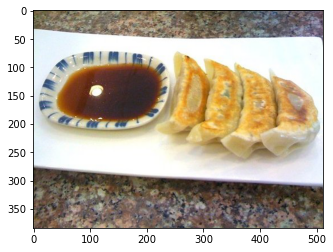

In [11]:
plt.imshow(simple_img)

In [12]:
# Kilka losowych obrazów
import random
images_idx = random.sample(range(len(train_labels)), 25)

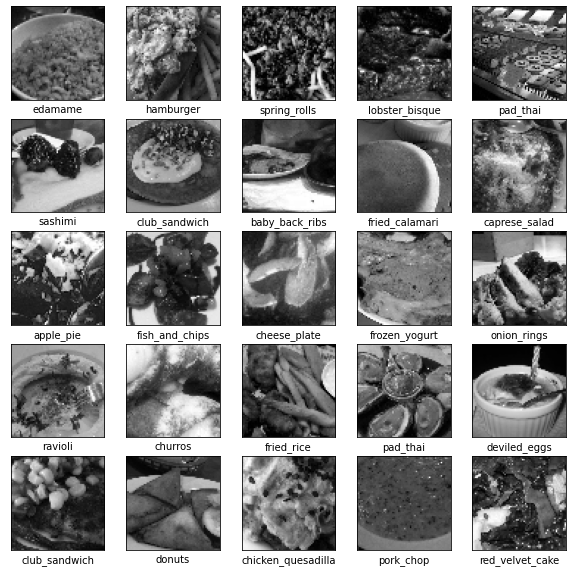

In [13]:
plt.figure(figsize=(10,10))
for i in range(len(images_idx)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[images_idx[i]], cmap='gray')
    plt.xlabel(train_labels[i])
plt.show()

In [14]:
# Label encoder

In [15]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(train_labels)
print(enc.classes_)

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

In [16]:
train_labels_ = enc.fit_transform(train_labels)

In [17]:
train_labels_ = train_labels_.reshape(-1,1)

In [18]:
train_labels_.shape

(10099, 1)

In [19]:
# Zmiana kształtu danych przeznaczonych do uczenia maszynowego

In [20]:
X = np.array(data).reshape(-1, 64, 64, 1)

# Podział danych na trenignowe i testowe

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, train_labels_, test_size=0.25)

# Pierwszy model

In [2]:
# Analogia do animals:
# Zaczynamy do małej liczby filtrów w warstwach konwolucyjnych i dodając kolejne zwiększamy ich liczbę: 32, 64, 128.
# Dodane warstwy to również Pooling, która pomaga zredukować macierze do mniejszych rozmiarów (za pomocą filtrowania
# oknami przesuwanymi wszerz i wzdłuż obrazu). Warstwa fully connected zawiera przedstawienie macierzy z poprzedniego
# kroku w postaci wektora dzięki któremy możemy przeprowadzić klasyfikację (klasa z najwyższym wynikiem jest 
# określana jako wyjściowa).

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, BatchNormalization, MaxPooling2D, Dropout

# Model will be a sequential - we'll add layers step by step # 64x64
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 1)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(5,5))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(101, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 60, 60, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                        

In [24]:
import tensorflow as tf
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30


C:\Users\wmlyn\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


237/237 [==============================] - 79s 324ms/step - loss: 5.0126 - accuracy: 0.0180 - val_loss: 5.6859 - val_accuracy: 0.0095
Epoch 2/30
237/237 [==============================] - 77s 325ms/step - loss: 4.6648 - accuracy: 0.0302 - val_loss: 4.9017 - val_accuracy: 0.0162
Epoch 3/30
237/237 [==============================] - 78s 327ms/step - loss: 4.4723 - accuracy: 0.0425 - val_loss: 4.4647 - val_accuracy: 0.0352
Epoch 4/30
237/237 [==============================] - 77s 325ms/step - loss: 4.2914 - accuracy: 0.0573 - val_loss: 4.3670 - val_accuracy: 0.0527
Epoch 5/30
237/237 [==============================] - 77s 327ms/step - loss: 4.1058 - accuracy: 0.0825 - val_loss: 4.3931 - val_accuracy: 0.0471
Epoch 6/30
237/237 [==============================] - 78s 329ms/step - loss: 3.9546 - accuracy: 0.1010 - val_loss: 4.3950 - val_accuracy: 0.0416
Epoch 7/30
237/237 [==============================] - 78s 328ms/step - loss: 3.7784 - accuracy: 0.1335 - val_loss: 4.3780 - val_accuracy: 0.0

In [25]:
# Krzywa uczenia (błędy)

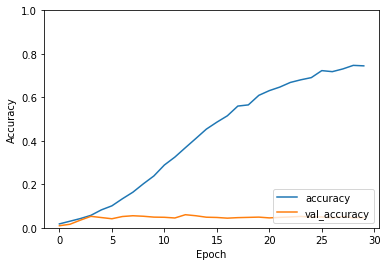

In [26]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

In [3]:
# Wniosek: model zaczyna uczyć się danych treningowych, jednak nie potrafi generalizować. Musimy poszukać innego modelu.

In [27]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

79/79 - 4s - loss: 5.7413 - accuracy: 0.0467 - 4s/epoch - 52ms/step


In [28]:
# Predykcje
preds=[]

for no, sample in enumerate(X_test):
    sample=sample.reshape(1,64,64,1)
    preds.append(model.predict(sample))

In [29]:
p = [np.argmax(pred) for pred in preds]

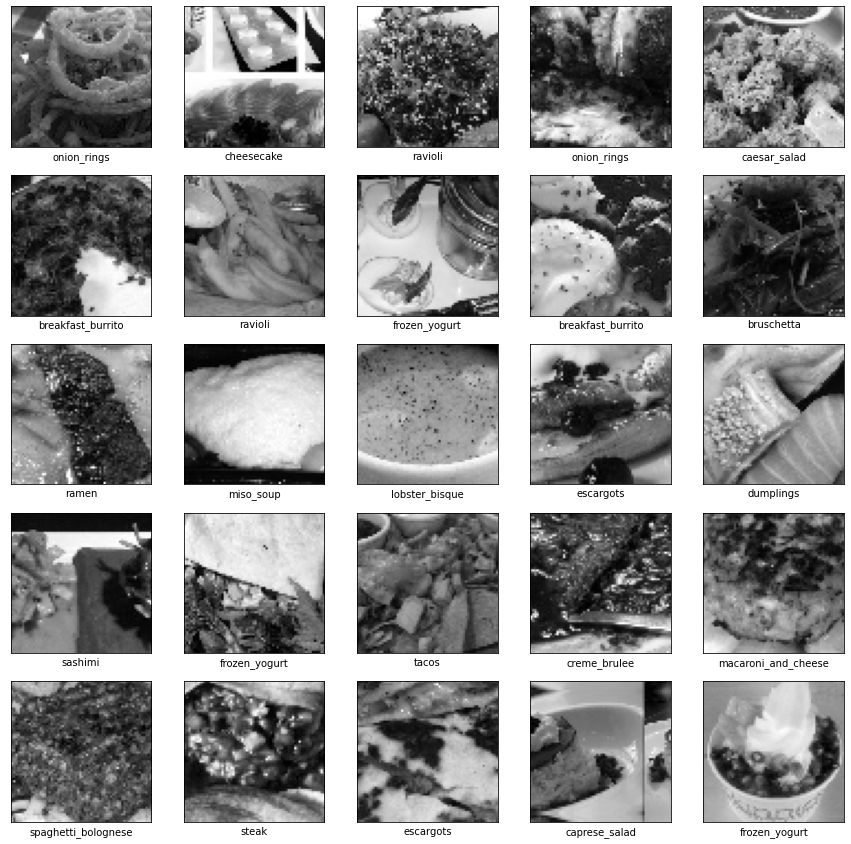

In [30]:
# Wizualizacja wyników (przykładowa)
import random
images_idx = list(range(len(p)))
chosen_idx = random.sample(images_idx, k = 25)

plt.figure(figsize=(15,15))
for i, idx in enumerate(chosen_idx):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[idx], cmap='gray')
    plt.xlabel(enc.inverse_transform([p[idx]])[0])
plt.show()

In [31]:
# Macierz pomyłek
from sklearn.metrics import confusion_matrix

In [32]:
data = confusion_matrix(y_test, p)

In [33]:
data

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 3, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
# Test
for i in range(10):
    print(enc.inverse_transform([i]))

['apple_pie']
['baby_back_ribs']
['baklava']
['beef_carpaccio']
['beef_tartare']
['beet_salad']
['beignets']
['bibimbap']
['bread_pudding']
['breakfast_burrito']


In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(data, columns=np.unique(train_labels), index = np.unique(train_labels))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(14,14))
sn.set(font_scale=0.5)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 4})# font size

# Model drugi

In [36]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, BatchNormalization, MaxPooling2D, Dropout

In [4]:
# Struktura zaczerpnięta z repozytorium github: https://github.com/JNYH/Project_Kojak/blob/master/first_CNN_model.ipynb

In [37]:
model2 = Sequential()   # (i.e. TensorFlow ordering)  # 28x28
chanDim = -1
classes = 101

# CONV => RELU => POOL layer set              # first CONV layer has 32 filters of size 3x3
model2.add(Conv2D(32, (3, 3), padding="same", input_shape=(64,64,1)))
model2.add(Activation("relu"))                 # ReLU (Rectified Linear Unit) activation function
model2.add(BatchNormalization(axis=chanDim))   # normalize activations of input volume before passing to next layer
model2.add(MaxPooling2D(pool_size=(2, 2)))     # progressively reduce spatial size (width and height) of input 
model2.add(Dropout(0.25))                      # disconnecting random neurons between layers, reduce overfitting

# (CONV => RELU) * 2 => POOL layer set          # filter dimensions remain the same (3x3)
model2.add(Conv2D(64, (3, 3), padding="same"))   # increase total number of filters learned (from 32 to 64)
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(64, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# (CONV => RELU) * 3 => POOL layer set
model2.add(Conv2D(128, (3, 3), padding="same"))   # total number of filters learned by CONV layers has doubled (128)
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(128, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(Conv2D(128, (3, 3), padding="same"))
model2.add(Activation("relu"))
model2.add(BatchNormalization(axis=chanDim))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

# first (and only) set of fully connected layer (FC) => RELU layers
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation("relu"))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))

# softmax classifier
model2.add(Dense(classes))
model2.add(Activation("softmax"))

In [38]:
import tensorflow as tf
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30


C:\Users\wmlyn\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


237/237 [==============================] - 108s 447ms/step - loss: 5.2622 - accuracy: 0.0168 - val_loss: 6.1086 - val_accuracy: 0.0119
Epoch 2/30
237/237 [==============================] - 104s 438ms/step - loss: 5.0108 - accuracy: 0.0268 - val_loss: 5.6446 - val_accuracy: 0.0158
Epoch 3/30
237/237 [==============================] - 105s 444ms/step - loss: 4.6866 - accuracy: 0.0429 - val_loss: 4.5672 - val_accuracy: 0.0424
Epoch 4/30
237/237 [==============================] - 105s 443ms/step - loss: 4.3925 - accuracy: 0.0622 - val_loss: 5.1724 - val_accuracy: 0.0253
Epoch 5/30
237/237 [==============================] - 106s 447ms/step - loss: 4.1739 - accuracy: 0.0804 - val_loss: 4.8324 - val_accuracy: 0.0444
Epoch 6/30
237/237 [==============================] - 105s 442ms/step - loss: 3.8481 - accuracy: 0.1208 - val_loss: 4.6540 - val_accuracy: 0.0527
Epoch 7/30
237/237 [==============================] - 104s 440ms/step - loss: 3.6312 - accuracy: 0.1603 - val_loss: 4.5594 - val_accura

# Podejście z 30 klasami (wybór 30 klas z całego datasetu)

In [5]:
# Ładowanie danych manualne - kształt obrazu 32x32x3 

In [40]:
images = []
labels = []

IMG_SIZE = 32
images_limit = 1000

directory = 'archive2/'
for dir in os.listdir(directory):
    img_counter = 0
    print(dir)
    for img in os.listdir(directory+dir+'/'):
        if(img_counter==1000):
            break
        
        img_color = cv2.imread((directory+dir+'/'+img))
        img_resize = cv2.resize(img_color, (IMG_SIZE, IMG_SIZE))
        img_resize = img_resize/255.0
        images.append(img_resize)
        labels.append(dir)
        
        img_counter+=1

garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho


In [41]:
images[0].shape

(32, 32, 3)

In [42]:
X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [43]:
X.shape

(30000, 32, 32, 3)

In [44]:
X = np.array(images)

In [7]:
# Zapis do tablicy numpy
np.save('X_32_32.npy', X)

In [46]:
labels_arr = np.array(labels)

In [47]:
np.save('Y_32_32.npy', labels_arr)

In [48]:
# Load
X = np.load('X_32_32.npy')/255.0
labels = np.load('Y_32_32.npy')

In [49]:
# Enkoder - label encoder

In [50]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(labels)
print(enc.classes_)

['garlic_bread' 'gnocchi' 'greek_salad' 'grilled_cheese_sandwich'
 'grilled_salmon' 'guacamole' 'gyoza' 'hamburger' 'hot_and_sour_soup'
 'hot_dog' 'huevos_rancheros' 'hummus' 'ice_cream' 'lasagna'
 'lobster_bisque' 'lobster_roll_sandwich' 'macaroni_and_cheese' 'macarons'
 'miso_soup' 'mussels' 'nachos' 'omelette' 'onion_rings' 'oysters'
 'pad_thai' 'paella' 'pancakes' 'panna_cotta' 'peking_duck' 'pho']


In [51]:
labels_out = enc.fit_transform(labels)

In [52]:
labels_out = labels_out.reshape(-1,1)

In [53]:
labels_out.shape

(30000, 1)

In [8]:
# Podział danych na treningowe i testowe

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, labels_out, test_size=0.25)

# Wykorzystanie transfer learningu - ResNet50

In [9]:
# Transfer learning - bazowano na: https://www.kaggle.com/viratkothari/image-classification-transfer-learning-resnet50

In [57]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras import models, layers

model_resnet=resnet50.ResNet50(weights='imagenet')
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [58]:
input_layer=layers.Input(shape=(32,32,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [59]:
last_layer=resnet_model.output # we are taking last layer of the model
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(30,activation='softmax')(flatten)

model=models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [60]:
for layer in model.layers[:-1]:
    layer.trainable=False

In [61]:
from tensorflow.keras.utils import to_categorical
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [62]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [63]:
history = model.fit(X_train,y_train_cat,epochs=10,verbose=True,validation_data=(X_test,y_test_cat))

Epoch 1/10
704/704 [==============================] - 854s 1s/step - loss: 3.5400 - accuracy: 0.0333 - val_loss: 3.5146 - val_accuracy: 0.0347
Epoch 2/10
704/704 [==============================] - 821s 1s/step - loss: 3.5403 - accuracy: 0.0319 - val_loss: 3.5706 - val_accuracy: 0.0316
Epoch 3/10
704/704 [==============================] - 826s 1s/step - loss: 3.5384 - accuracy: 0.0345 - val_loss: 3.5896 - val_accuracy: 0.0339
Epoch 4/10
704/704 [==============================] - 824s 1s/step - loss: 3.5371 - accuracy: 0.0350 - val_loss: 3.4866 - val_accuracy: 0.0357
Epoch 5/10
704/704 [==============================] - 825s 1s/step - loss: 3.5354 - accuracy: 0.0354 - val_loss: 3.6070 - val_accuracy: 0.0323
Epoch 6/10
704/704 [==============================] - 823s 1s/step - loss: 3.5359 - accuracy: 0.0356 - val_loss: 3.5221 - val_accuracy: 0.0347
Epoch 7/10
704/704 [==============================] - 822s 1s/step - loss: 3.5410 - accuracy: 0.0326 - val_loss: 3.5865 - val_accuracy: 0.0328

# 30 klas (wykorzystanie ImageDataGenerator)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator(rescale = 1./255, rotation_range=30,
        shear_range=0.3,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.25, validation_split=0.25)

In [12]:
train_data = datagen.flow_from_directory(directory='archive2/', target_size=(224,224), subset='training')

Found 22500 images belonging to 30 classes.


In [13]:
validation_data = datagen.flow_from_directory(directory='archive2/', target_size=(224, 224), subset='validation')

Found 7500 images belonging to 30 classes.


In [68]:
from tensorflow.keras.applications import resnet50
from tensorflow.keras import models, layers

model_resnet=resnet50.ResNet50(weights='imagenet')
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [69]:
input_layer=layers.Input(shape=(224,224,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [70]:
last_layer=resnet_model.output # we are taking last layer of the model
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(30,activation='softmax')(flatten)

model=models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [71]:
for layer in model.layers[:-1]:
    layer.trainable=False

In [72]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [9]:
history = model.fit(train_data, epochs=5, verbose=True) 

NameError: name 'train_data' is not defined

In [74]:
model_ResNet.evaluate(validation_data)

NameError: name 'model_ResNet' is not defined

# Najlepszy model - MobileNetV2

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, TensorBoard, ModelCheckpoint
from tensorflow.keras.models import load_model

In [2]:
base = MobileNetV2(input_shape=(224,224,3),include_top=False,weights='imagenet')
base.trainable = True
model = Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(30, activation='softmax'))
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_data, 
                    epochs=20,
                    validation_data = validation_data)

In [10]:
# Zobaczmy wyniki nauki i walidacji

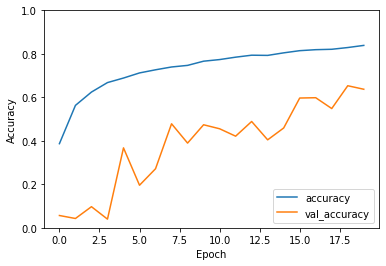

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

Podczas implementacji wykorzystanych zostało wiele modeli - analogicznie do tych, które zostały opisane w pliku animals.
Tutaj najlepszym modelem okazał się MobileNetV2 pozwalający na osiągnięcie accuracy dla danych walidacyjnych
powyżej 60%, co jest bardzo dobrym wynikiem. Dla tego zbioru (zdjęcia jedzenia) model ResNet50 który działał bardzo
dobrze dla zdjęć zwierząt nie był wystarczający. Podsumowując - accuracy dla zbioru danych z jedzeniem nie jest tak wysokie
jak dla zbioru danych ze zwierzętami. Wynika to z dużego podobieństwa dań / potraw. Zwierzęta są bardziej charakterystyczne
i sieci konwolucyjne lepiej ekstrahują cechy z takich obrazów. Ograniczenie liczby klas poprawiło wyniki klasyfikacji (znacząco). Interesującym wnioskiem jest rozmiar obrazów. Duże zdjęcia pozwalają na osiąganie lepszych wyników, jednak trening jest 
znacznie dłuższy.

Podsumowując, klasyfikacja zarówno zwierząt, jak i potraw za pomocą sieci neuronowej konwolucyjnej (CNN) jest możliwa. Uzyskana dokładność zależy od wielu czynników. Najważniejszym z nich jest struktura modelu - możemy stosować różną liczbę warstw, ale jej zwiększanie nie zawsze jest dobrym pomysłem. Im większy rozmiar sieci, tym dłużej się ją trenuje. Najlepszym rozwiązaniem okazało się uczenie transferowe (wstępnie wytrenowany model). Jest to bardzo dobry pomysł, ale model ten musiał być wcześniej trenowany przez długi czas. Uzyskana dokładność wynosiła wówczas około 80% dla zwierząt
oraz ponad 60% dla dań.

In [1]:
# Kompletnie nowe podejście - zgodne z kodem kaggle # https://www.kaggle.com/code/hrialan/custom-model

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, BatchNormalization, MaxPooling2D, Dropout
import numpy as np
from matplotlib import image
import matplotlib.pyplot as plt
import os
import cv2
import h5py
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
dir_list_101 = []
directory = 'archive/images'
for dir in os.listdir(directory):
    img_counter = 0
    dir_list_101.append(dir)

In [14]:
# Podział datasetu - zrodlo:
# https://stackoverflow.com/questions/53074712/how-to-split-folder-of-images-into-test-training-validation-sets-with-stratified
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
    print("########### Train Test Val Script started ###########")
    #data_csv = pd.read_csv("DataSet_Final.csv") ##Use if you have classes saved in any .csv file

    root_dir = 'image_devided'
    classes_dir = dir_list_101

    #for name in data_csv['names'].unique()[:10]:
    #    classes_dir.append(name)

    processed_dir = 'archive/images'

    val_ratio = 0.2
    test_ratio = 0

    for cls in classes_dir:
        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"//" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames = [src + '//' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '//' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '//' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(root_dir + '/train//' + cls)
        os.makedirs(root_dir + '/val//' + cls)
        os.makedirs(root_dir + '/test//' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train//' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val//' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test//' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

########### Train Test Val Script started ###########
$$$$$$$ Class Name apple_pie $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name baby_back_ribs $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name baklava $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name beef_carpaccio $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name beef_tartare $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name beet_salad $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name beignets $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name bibimbap $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name bread_pudding $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name breakfast_burrito $$$$$$$
Total images: 

$$$$$$$ Class Name red_velvet_cake $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name risotto $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name samosa $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name sashimi $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name scallops $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name seaweed_salad $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name shrimp_and_grits $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name spaghetti_bolognese $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name spaghetti_carbonara $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 200
$$$$$$$ Class Name spring_rolls $$$$$$$
Total images: 1000
Training: 800
Validation: 0
Testing: 20

In [3]:
img_width, img_height, batch_size = 180, 180, 64

In [4]:
train_data_generator = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split = 0.2)

test_data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2)

In [5]:
data_dir = 'archive\images'

In [6]:
train_data = train_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training')

val_data = test_data_generator.flow_from_directory(
    data_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode='categorical',
    subset = 'validation')

Found 80800 images belonging to 101 classes.
Found 20200 images belonging to 101 classes.


In [7]:
class_dict  = train_data.class_indices
class_names = []
for cat in class_dict.keys():
    class_names.append(cat)
print(class_names)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

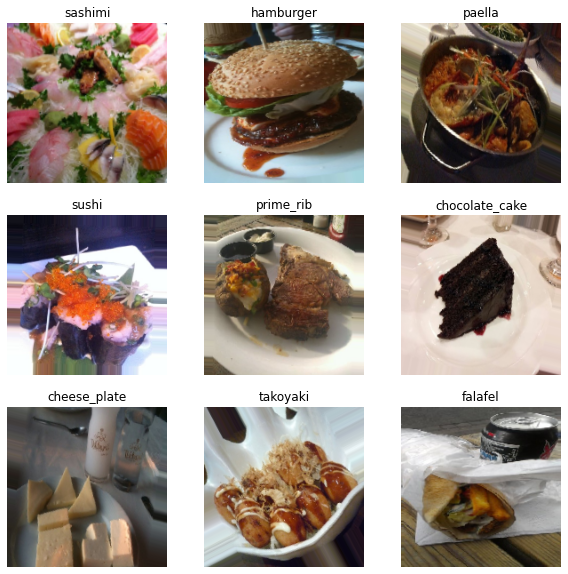

In [8]:
import random
random_batch = train_data[random.randint(0, batch_size)]
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(random_batch[0][i])
    plt.title(class_names[random_batch[1][i].argmax()])
    plt.axis("off")

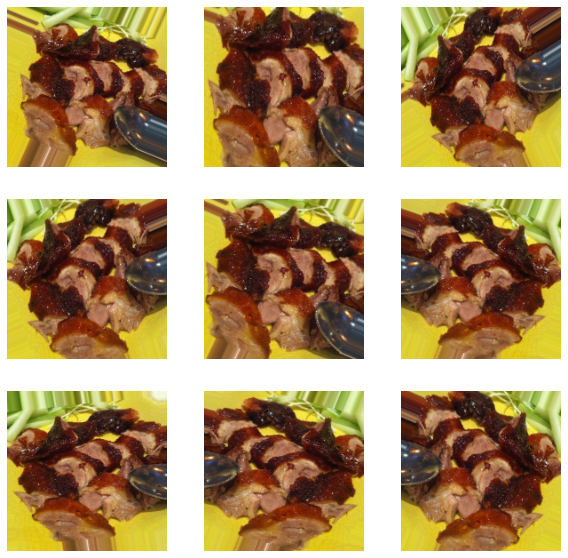

In [9]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img_test = train_data[7][0][31] # img 31 of the 7th batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img_test)
    plt.axis("off")

In [10]:
num_classes = len(class_names)

model = Sequential([
  BatchNormalization(input_shape=(img_width, img_height, 3)),  
  Conv2D(16, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(32, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(64, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Conv2D(128, 3, padding='same', activation='relu'),
  MaxPooling2D(),
  Dropout(0.3),
  Flatten(),
  Dense(512, activation='relu'),
  Dense(num_classes, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 180, 180, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

In [13]:
epochs=20
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs,
  batch_size=batch_size,
)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1263/1263 [==============================] - ETA: 0s - loss: 4.2951 - accuracy: 0.0568WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000293098380D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and att

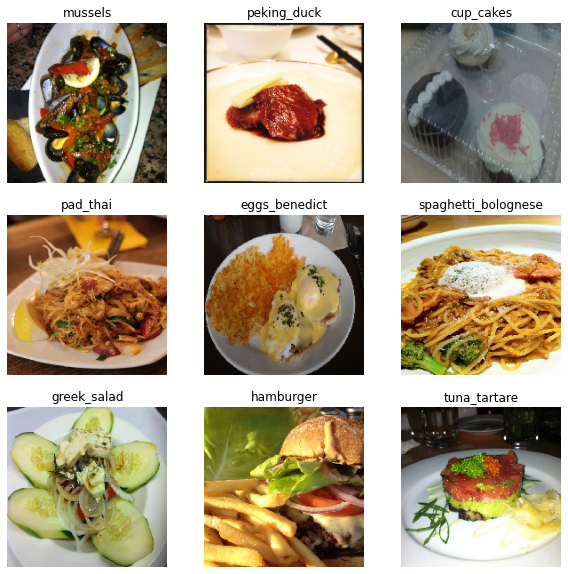

In [47]:
# Rzeczywiste:
import random
random_batch = val_data[random.randint(0, batch_size)]
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(random_batch[0][i])
    plt.title(class_names[random_batch[1][i].argmax()])
    plt.axis("off")

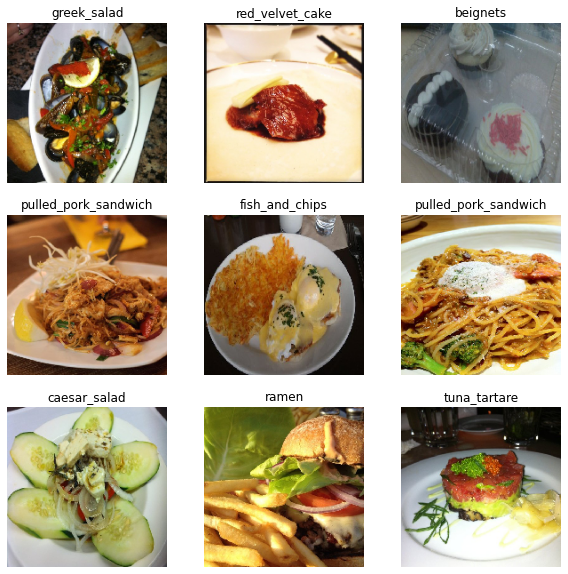

In [48]:
# Predykcje
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(random_batch[0][i])
    plt.title(class_names[np.argmax(model.predict(random_batch[0][i].reshape(1,180,180,3)))])
    plt.axis("off")